### **데이터 프레임 기초**
    * 행은 필드, 열은 레코드로 표현하기도 함 

In [71]:
data = '''
윤경환, 성형석
김동현, 최재권
이재범, 주미현
윤도하, 황지의
이승환, 박호정
박주형, 백혜리
차혁주,한다연
김동민, 이예림
박세웅, 장유미
우만경, 김태호
권용희, 유해성
최지욱, 김현우
'''
data

'\n윤경환, 성형석\n김동현, 최재권\n이재범, 주미현\n윤도하, 황지의\n이승환, 박호정\n박주형, 백혜리\n차혁주,한다연\n김동민, 이예림\n박세웅, 장유미\n우만경, 김태호\n권용희, 유해성\n최지욱, 김현우\n'

In [60]:
#### \와 ' '을 제거하기
    # 제거: 찾는 값을 바꿀 값으로 변경
# 1)
new_data = data.replace("\n", ","+" ")

# 2)
import re
del_data = re.sub("\n", ","+"", data[1:])
del_data = re.sub(" ", "", del_data)
del_data

'윤경환,성형석,김동현,최재권,이재범,주미현,윤도하,황지의,이승환,박호정,박주형,백혜리,차혁주,한다연,김동민,이예림,박세웅,장유미,우만경,김태호,권용희,유해성,최지욱,김현우,'

### **정규표현식 사용**

In [38]:
import re

def extract_korean_and_comma(input_text):
    # 한글과 쉼표를 제외한 모든 문자 제거
    cleaned_text = re.sub(r'[^ㄱ-ㅎ가-힣]+', ''+",", input_text)
    return cleaned_text

# 테스트를 위한 문자열
input_string = data

# 정제된 문자열 출력
result = extract_korean_and_comma(input_string[1:])
print(result)


윤경환,성형석,김동현,최재권,이재범,주미현,윤도하,황지의,이승환,박호정,박주형,백혜리,차혁주,한다연,김동민,이예림,박세웅,장유미,우만경,김태호,권용희,유해성,최지욱,김현우,


In [29]:
nameList=[]
nameList.append([])
nameList[-1].append('a')
nameList[-1].append('b')

nameList.append([])
nameList[-1].append('aa')
nameList[-1].append('bb')

nameList

[['a', 'b'], ['aa', 'bb']]

In [67]:
import numpy as np

# data = data.split(",")
# data = np.array(data)
# np.shape(data)
np.reshape(del_data, (-1,1))

array([['윤경환,성형석,김동현,최재권,이재범,주미현,윤도하,황지의,이승환,박호정,박주형,백혜리,차혁주,한다연,김동민,이예림,박세웅,장유미,우만경,김태호,권용희,유해성,최지욱,김현우,']],
      dtype='<U96')

In [66]:
# nameList = [ [] for cnt, name in enumerate(data) if cnt % 2 == 0 else ]
data = data.split(",")

nameList = []
for cnt, name in enumerate(data):
    if cnt % 2 == 0:
        nameList.append([])
    nameList[-1].append(name)
nameList


[['\n윤경환', ' 성형석\n김동현'],
 [' 최재권\n이재범', ' 주미현\n윤도하'],
 [' 황지의\n이승환', ' 박호정\n박주형'],
 [' 백혜리\n차혁주', '한다연\n김동민'],
 [' 이예림\n박세웅', ' 장유미\n우만경'],
 [' 김태호\n권용희', ' 유해성\n최지욱'],
 [' 김현우\n']]

In [73]:
data_list = [line.split(', ') for line in data.strip().split('\n')]

# 결과 출력
nameList = []
for row in data_list:
    nameList.append(row)
nameList    

[['윤경환', '성형석'],
 ['김동현', '최재권'],
 ['이재범', '주미현'],
 ['윤도하', '황지의'],
 ['이승환', '박호정'],
 ['박주형', '백혜리'],
 ['차혁주,한다연'],
 ['김동민', '이예림'],
 ['박세웅', '장유미'],
 ['우만경', '김태호'],
 ['권용희', '유해성'],
 ['최지욱', '김현우']]

In [79]:
indexList = list(range(0,len(nameList)+1))
index_list = []
for index in indexList:
    index_list.append([index])
np.shape(index_list)

(13, 1)

In [1]:
%pip install pandas

In [31]:
import pandas as pd
df = pd.read_csv(r"C:\data\dataList\weather.csv" )
# df.head()
# df.loc[:3,:]
col = list(df.columns)
type(col)
col.index('max_wind')

2

In [15]:
df.iloc[:3,[1,3]] #1열과 3열만 보자

,temp,mean_wind
0,28.7,3.4
1,25.2,3.8
2,22.1,2.9


In [27]:
df.loc[:5,['max_wind', 'mean_wind']]

,max_wind,mean_wind
0,8.3,3.4
1,8.7,3.8
2,6.3,2.9
3,6.6,4.2
4,9.1,5.6
5,9.8,8.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       3653 non-null   object 
 1   temp       3653 non-null   float64
 2   max_wind   3649 non-null   float64
 3   mean_wind  3647 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB


In [4]:
df.describe()
# 데이터의 총량은 많으나 극단값(이상치)의 수가 적기 때문에 전체 평균에 큰 영향을 미치지 않음 

,temp,max_wind,mean_wind
count,3653.000000,3649.000000,3647.000000
mean,12.942102,7.911099,3.936441
std,8.538507,3.029862,1.888473
min,-9.000000,2.000000,0.200000
25%,5.400000,5.700000,2.500000
50%,13.800000,7.600000,3.600000
75%,20.100000,9.700000,5.000000
max,31.300000,26.000000,14.900000


In [33]:
# 원하는 필드만 기술통계 가능
df[['temp', 'max_wind']].describe()

,temp,max_wind
count,3653.000000,3649.000000
mean,12.942102,7.911099
std,8.538507,3.029862
min,-9.000000,2.000000
25%,5.400000,5.700000
50%,13.800000,7.600000
75%,20.100000,9.700000
max,31.300000,26.000000


In [35]:
# 문자 자료에 대한 기술통계도 가능함
df['date'].describe()

count           3653
unique          3653
top       2010-08-01
freq               1
Name: date, dtype: object

In [46]:
dfDescribe = df.describe()
# dfDescribe[['max_wind','mean_wind']]
dfDescribe.iloc[[1,7],:] # 1번과 7번행, 모든 열 조회

,temp,max_wind,mean_wind
mean,12.942102,7.911099,3.936441
max,31.300000,26.000000,14.900000


In [49]:
dfDescribe.T.iloc[:,[1,7]]
dfDescribe.T[['mean', '50%']] 
# 차트를 그릴 때 인덱스를  xticks의 제목으로 사용 가능

,mean,50%
temp,12.942102,13.8
max_wind,7.911099,7.6
mean_wind,3.936441,3.6


In [5]:
df.value_counts()

date        temp  max_wind  mean_wind
2010-08-01  28.7  8.3       3.4          1
2017-04-20  12.7  3.7       1.8          1
2017-03-25  5.7   5.1       2.3          1
2017-03-26  6.8   4.1       1.9          1
2017-03-27  5.3   4.6       1.5          1
                                        ..
2013-12-05  9.3   6.3       2.9          1
2013-12-06  4.9   6.4       3.5          1
2013-12-07  5.2   5.6       2.9          1
2013-12-08  5.7   4.1       1.9          1
2020-07-31  25.7  4.8       2.5          1
Length: 3646, dtype: int64

#### **차트 그리기**
* 데이터프레임의 기술통계표

In [50]:
import matplotlib.pyplot as plt

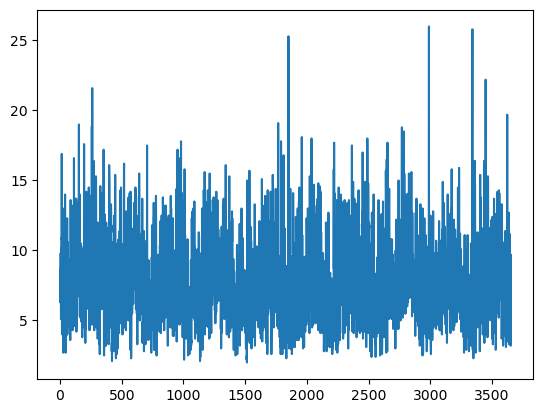

In [52]:
plt.plot(df['max_wind']) # x축은 인덱스(고유 번호 또는 번호 외의 값)

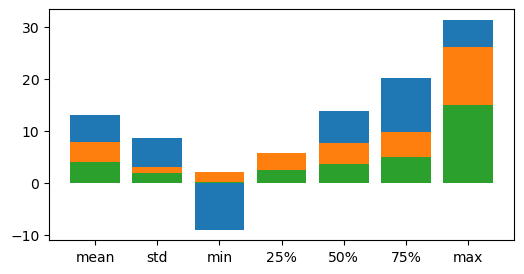

In [68]:
plt.figure(figsize=(6,3))
# plt.plot(dfDescribe['temp'][1:])
# plt.plot(dfDescribe['max_wind'][1:])
# plt.plot(dfDescribe['mean_wind'][1:])

plt.bar(dfDescribe.index[1:], dfDescribe['temp'][1:])
plt.bar(dfDescribe.index[1:], dfDescribe['max_wind'][1:])
plt.bar(dfDescribe.index[1:], dfDescribe['mean_wind'][1:])
plt.show()

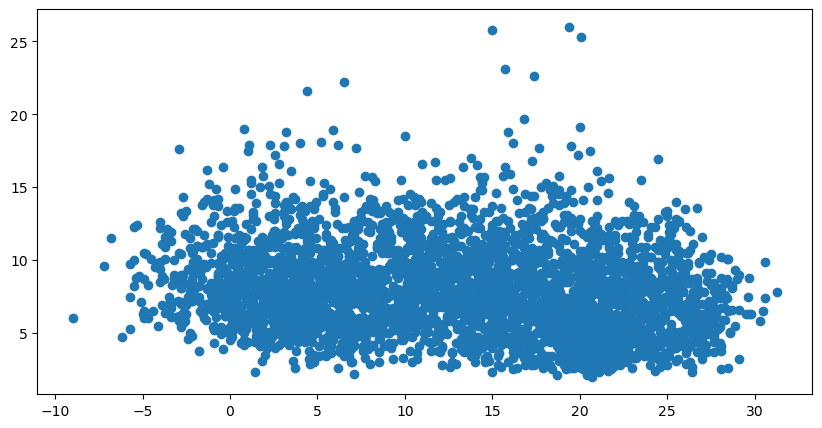

In [67]:
plt.figure(figsize=(10,5))
plt.scatter(x = df['temp'], y = df['max_wind'])

In [71]:
df = pd.read_csv(r"C:\data\dataList\bank.csv")
df.head()

,job,education,balance,duration,y
0,management,tertiary,2143,261,no
1,technician,secondary,265,348,no
2,blue-collar,secondary,-7,365,no
3,technician,secondary,-3,1666,no
4,technician,secondary,-103,145,no


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        7190 non-null   object
 1   education  6961 non-null   object
 2   balance    7234 non-null   int64 
 3   duration   7234 non-null   int64 
 4   y          7234 non-null   object
dtypes: int64(2), object(3)
memory usage: 282.7+ KB


In [73]:
dfDescribe = df.describe()
dfDescribe

,balance,duration
count,7234.000000,7234.000000
mean,1374.912911,262.875311
std,3033.882933,268.921065
min,-3313.000000,0.000000
25%,74.000000,103.000000
50%,453.500000,183.000000
75%,1470.750000,321.750000
max,81204.000000,3366.000000


In [74]:
df.value_counts()

job           education  balance  duration  y 
management    tertiary   0        60        no    4
                                  112       no    3
                                  144       no    3
                                  87        no    3
admin.        secondary  0        121       no    2
                                                 ..
entrepreneur  secondary  0        528       no    1
                                  510       no    1
                                  430       no    1
                                  387       no    1
unemployed    tertiary   14889    22        no    1
Length: 6895, dtype: int64

In [79]:
df.iloc[:,2].unique()

array([2143,  265,   -7, ..., 2779, 2543, 1428], dtype=int64)

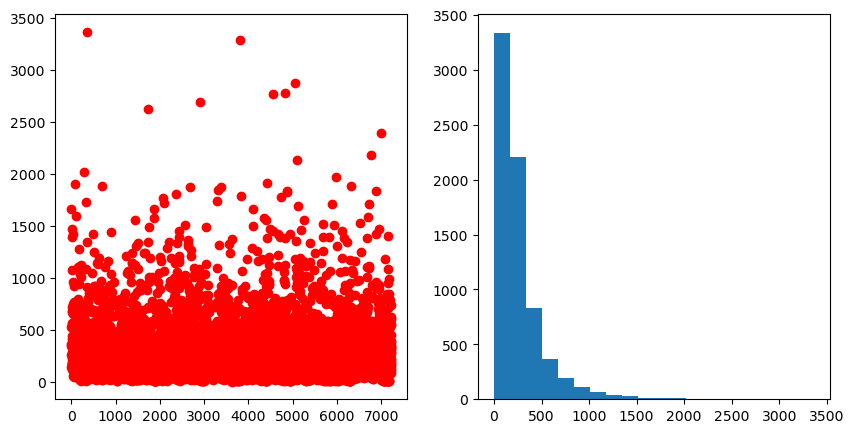

In [94]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.plot(df['duration'],'ro')

plt.subplot(1,2,2)
plt.hist(df['duration'], bins = 20)
plt.show()

In [103]:
df[['job', 'y']].describe()

,job,y
count,7190,7234
unique,11,2
top,management,no
freq,1560,6381


In [117]:
df['job'].unique() # = df.iloc[:,0].unique()

array(['management', 'technician', 'blue-collar', 'retired', 'services',
       'admin.', 'entrepreneur', 'self-employed', 'unemployed', 'student',
       nan, 'housemaid'], dtype=object)

<BarContainer object of 11 artists>

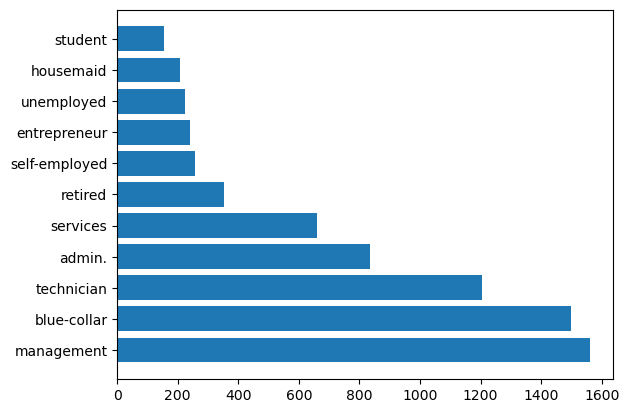

In [122]:
result = df['job'].value_counts()
plt.barh(result.index, result)

### **EDA(탐색적 데이터 분석)**
* 차트만으로도 데이터의 분포나 상관관계를 확인 할 수 있다. 
* 미래 데이터 예측 시 변수 설정

**결측치 시각화**


<AxesSubplot:>

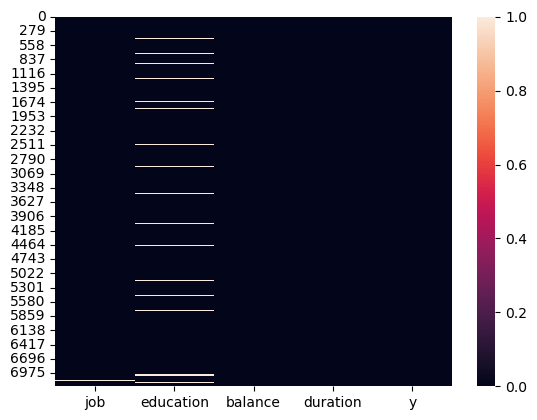

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv(r"C:\data\dataList\bank.csv")
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='y', ylabel='count'>

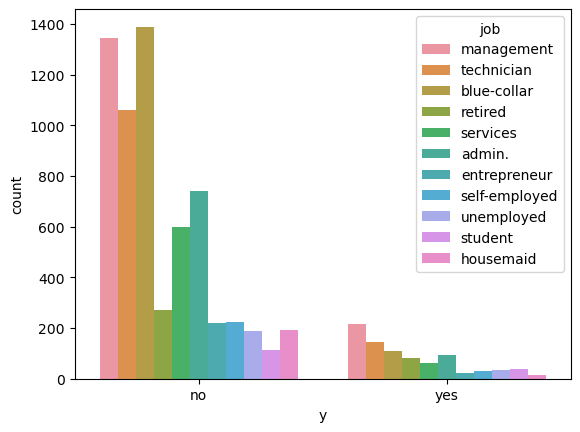

In [8]:
sns.countplot(data = df, x='y', hue='job')

**피어슨 상관계수**
* 두 변수의 선형 상관 관계를 계량화한 수치입니다.
* 결과값은 -1 ~ 1 사이의 값이며,
* 양의 상관 관계가 있을수록 1에 가깝고, 음의 상관 관계가 있을수록 -1에 가깝습니다.
* 또한, 상관 관계가 없을수록 0에 가깝습니다.

          balance  duration
balance   1.00000   0.00934
duration  0.00934   1.00000


<AxesSubplot:>

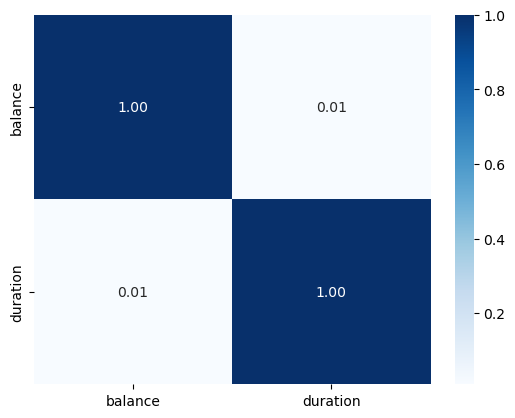

In [15]:
df.columns
df_corr = df[['balance', 'duration']].corr()
print(df_corr)
sns.heatmap(df_corr, annot = True, fmt = ".2f", cmap='Blues')